### **Loading Libraries**

In [ ]:
if(!require(devtools)) install.packages("devtools")
devtools::install_github("business-science/anomalize")
devtools::install_github("twitter/AnomalyDetection")
if(!require(anomalize)) install.packages("anomalize")
if(!require(AnomalyDetection)) install.packages("AnomalyDetection")
if(!require(quantmod)) install.packages("quantmod")
library(quantmod)
install.packages("dplyr")
library(dplyr)
library(tibbletime)
library(ggplot2)
library(lubridate)


### **Getting Data**

In [114]:
gsachs <- getSymbols("GS", src = "yahoo", from = "2016-01-01", to = as.character(Sys.Date()), auto.assign = FALSE)
gsachs_df <- data.frame(date = index(gsachs), close = as.numeric(gsachs[,'GS.Close']))
gsachs_tbl=tibble::as_tibble(gsachs_df)
dim(gsachs_tbl)
summary(gsachs_tbl)
tail(gsachs_tbl)

[1] 1152    2

      date                close      
 Min.   :2016-01-04   Min.   :135.0  
 1st Qu.:2017-02-23   1st Qu.:183.0  
 Median :2018-04-17   Median :215.2  
 Mean   :2018-04-16   Mean   :208.8  
 3rd Qu.:2019-06-10   3rd Qu.:233.9  
 Max.   :2020-07-30   Max.   :273.4  

date,close
<date>,<dbl>
2020-07-23,203.02
2020-07-24,201.47
2020-07-27,203.02
2020-07-28,201.62
2020-07-29,202.58
2020-07-30,199.53


## **Business Science : Tidy anomaly detection**

### **Normal Anomaly Detection**

Converting from tbl_df to tbl_time.
Auto-index message: index = date

frequency = 5 days

trend = 63 days



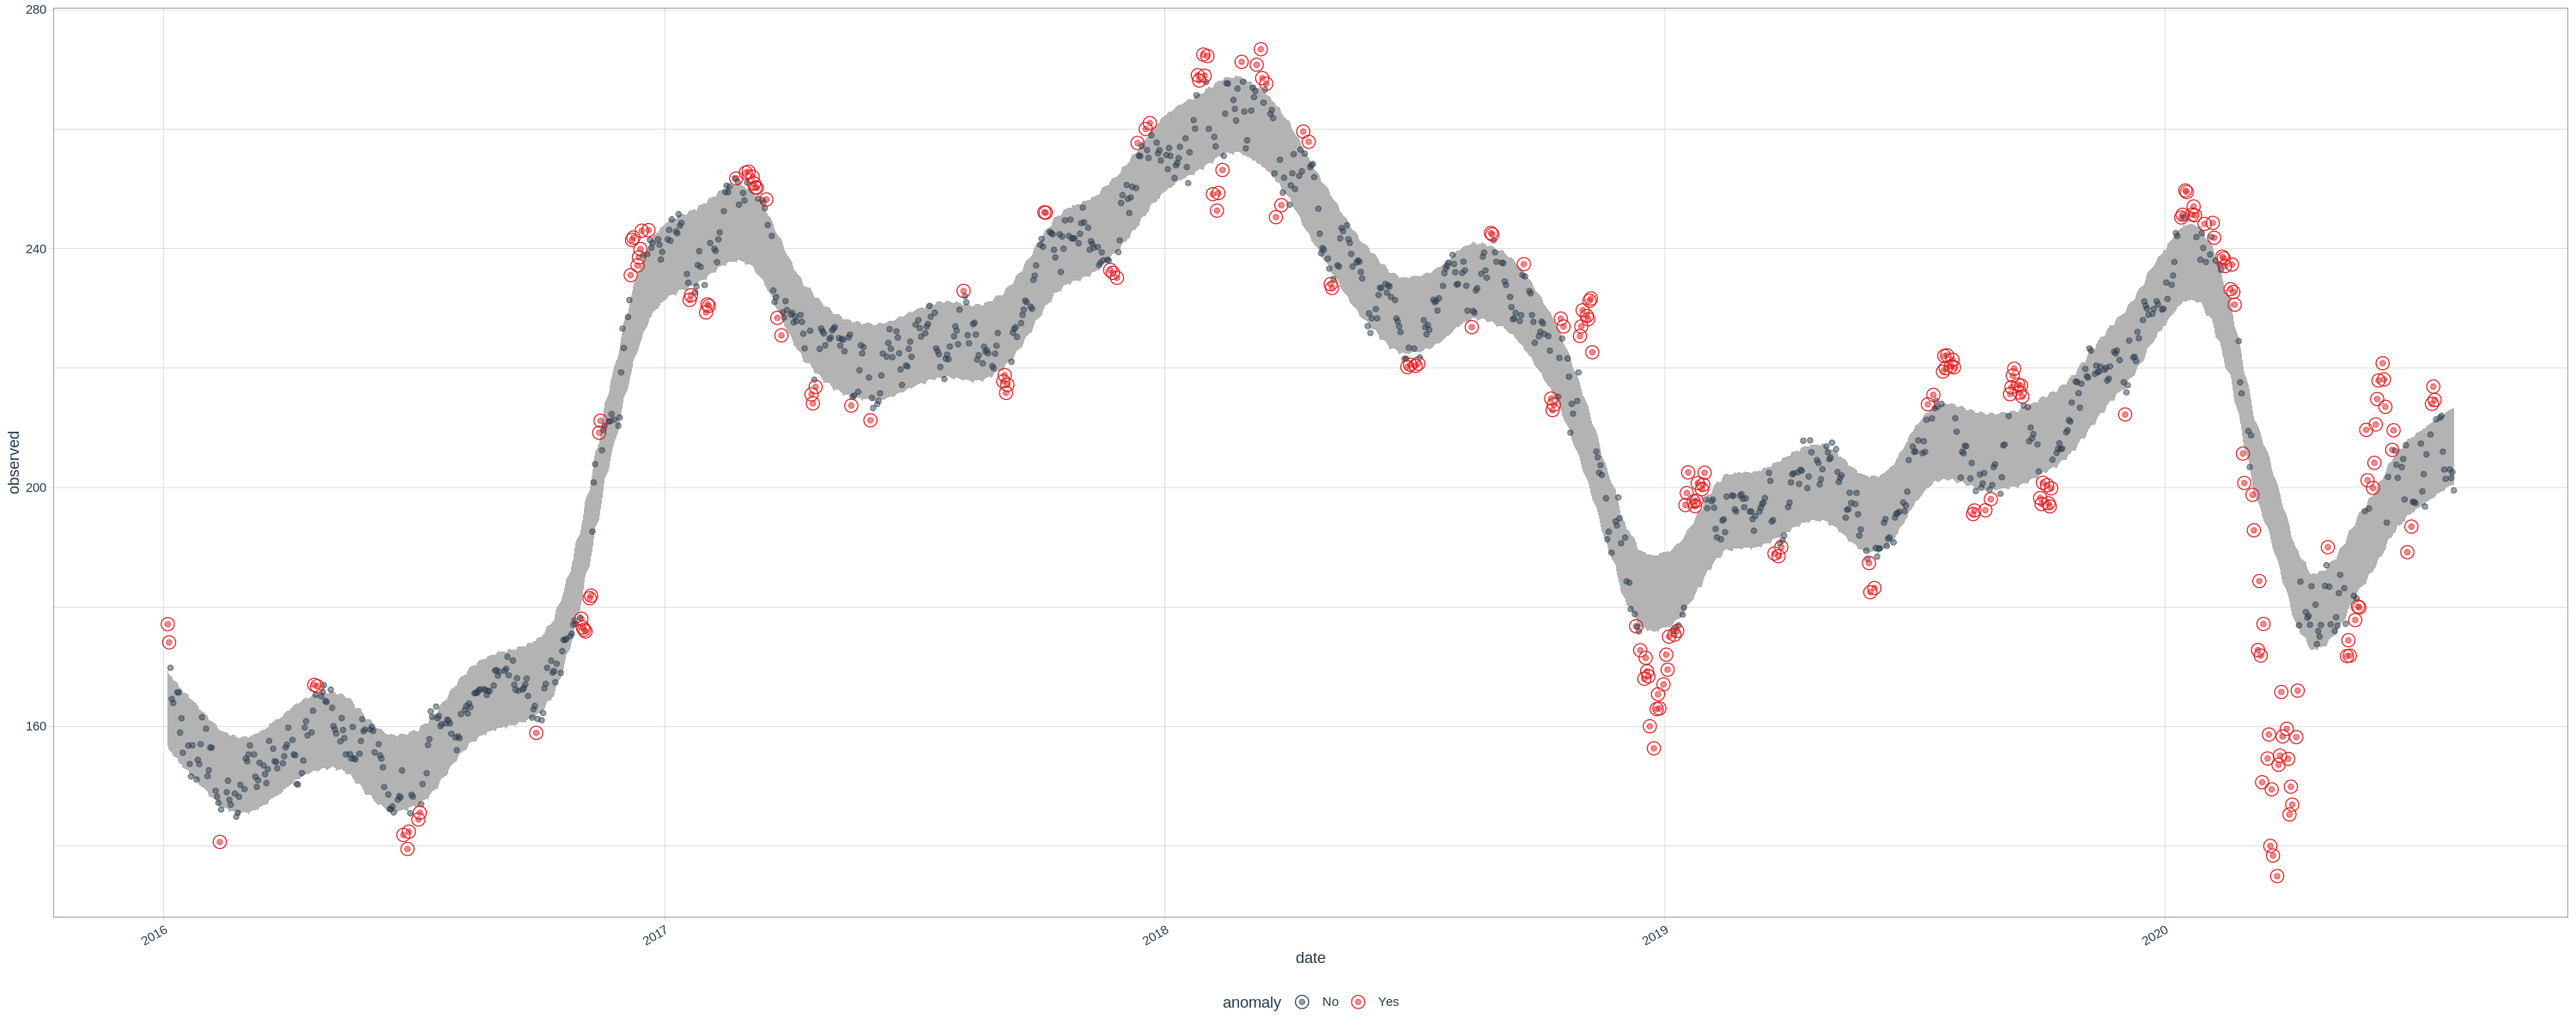

In [137]:
options(repr.plot.width = 25, repr.plot.height = 10)
gsachs_tbl %>%
    time_decompose(close) %>%
    anomalize(remainder, alpha = 0.5) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE, ncol = 3, alpha_dots = 0.5)

### **Decomposed Anomaly Detection with Trend and Seasonality Adjusted**

frequency = 5 days

Warning message:
“Problem with `mutate()` input `date`.
✖ Multi-unit not supported for weeks. Ignoring.
ℹ Input `date` is `collapse_index(...)`.”
Warning message in lubridate::floor_date(x, unit):
“Multi-unit not supported for weeks. Ignoring.”
Warning message:
“Problem with `mutate()` input `date`.
✖ Multi-unit not supported for weeks. Ignoring.
ℹ Input `date` is `collapse_index(...)`.”
Warning message in lubridate::ceiling_date(x, unit):
“Multi-unit not supported for weeks. Ignoring.”
trend = 10 days



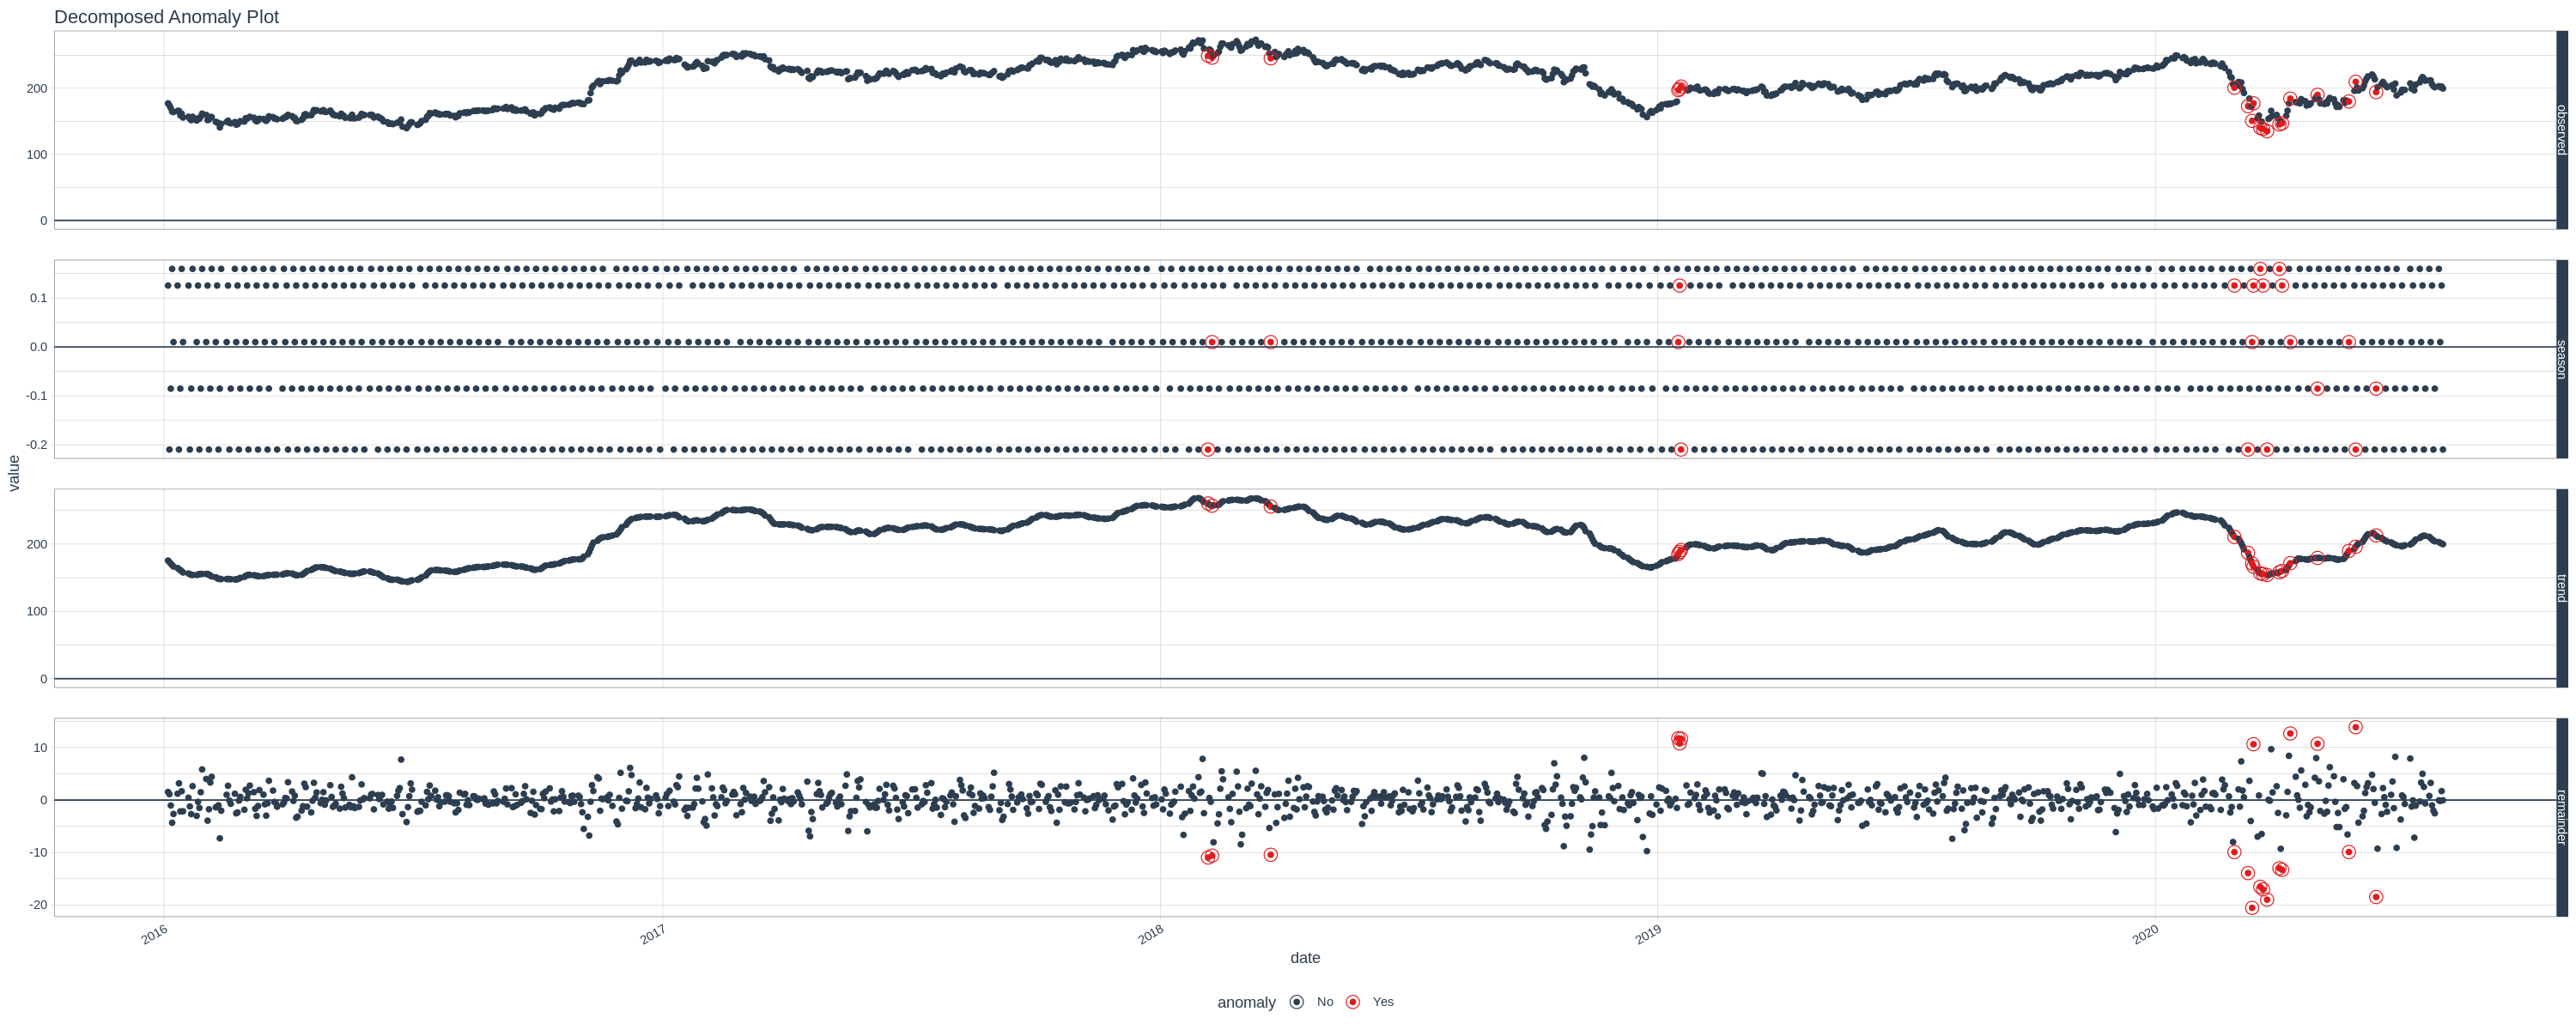

In [71]:
gsachs_tbl <- prep_tbl_time(gsachs_tbl) %>%
    ungroup()
gsachs_tbl_anomalized <- gsachs_tbl %>% 
    time_decompose(close,frequency = "auto",
                   trend     = "2 weeks") %>%
    anomalize(remainder) %>%
    time_recompose()
gsachs_decomposed <- gsachs_tbl_anomalized %>%
  plot_anomaly_decomposition() +
  ggtitle("Decomposed Anomaly Plot")

gsachs_decomposed

### **Detection with 5% and 15% Anomalies Allowed**

frequency = 5 days

trend = 63 days

frequency = 5 days

trend = 63 days



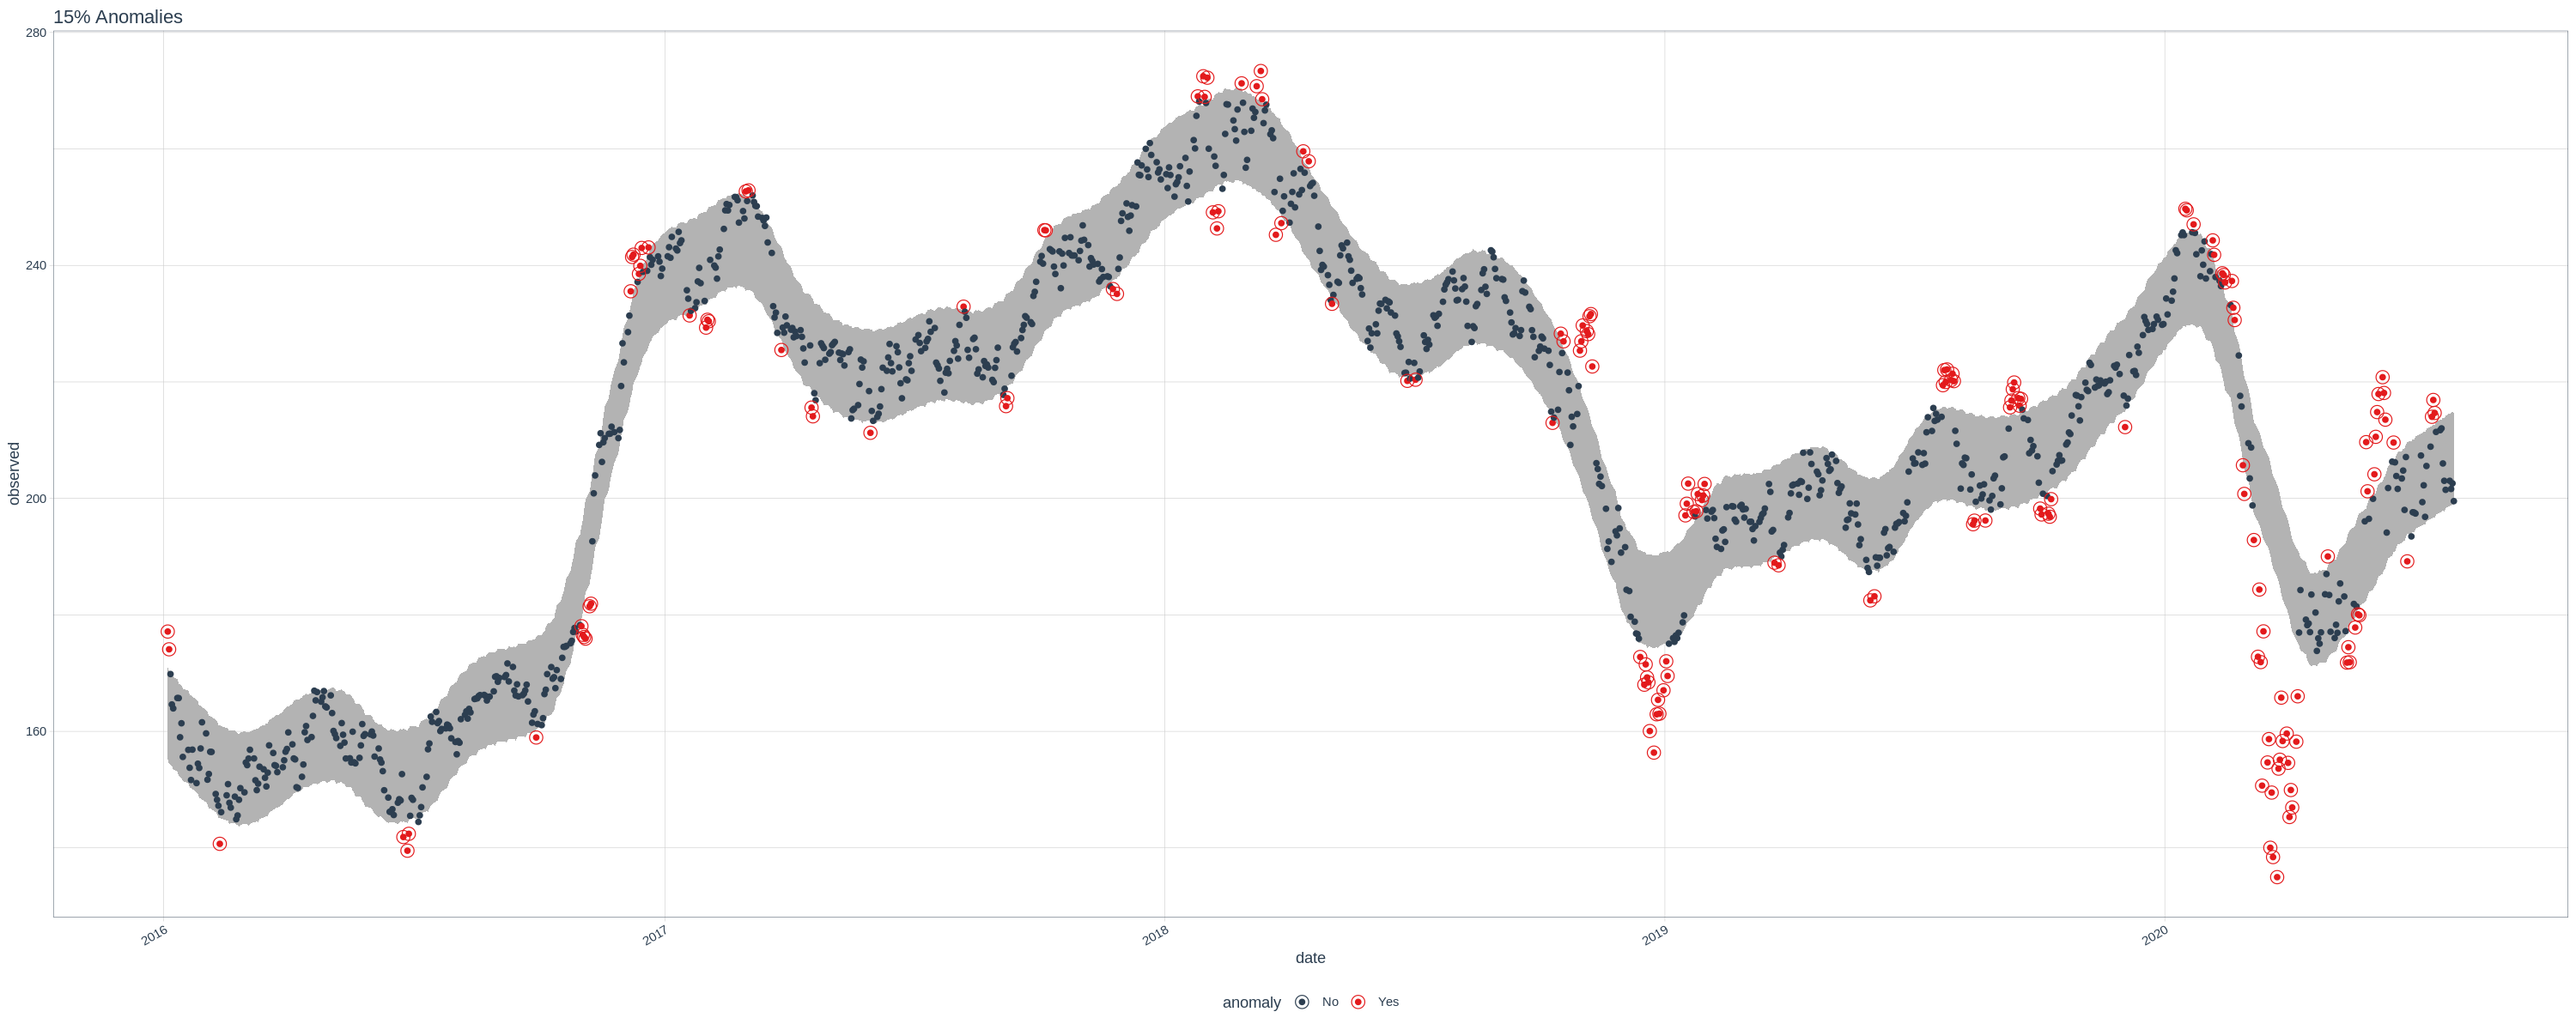

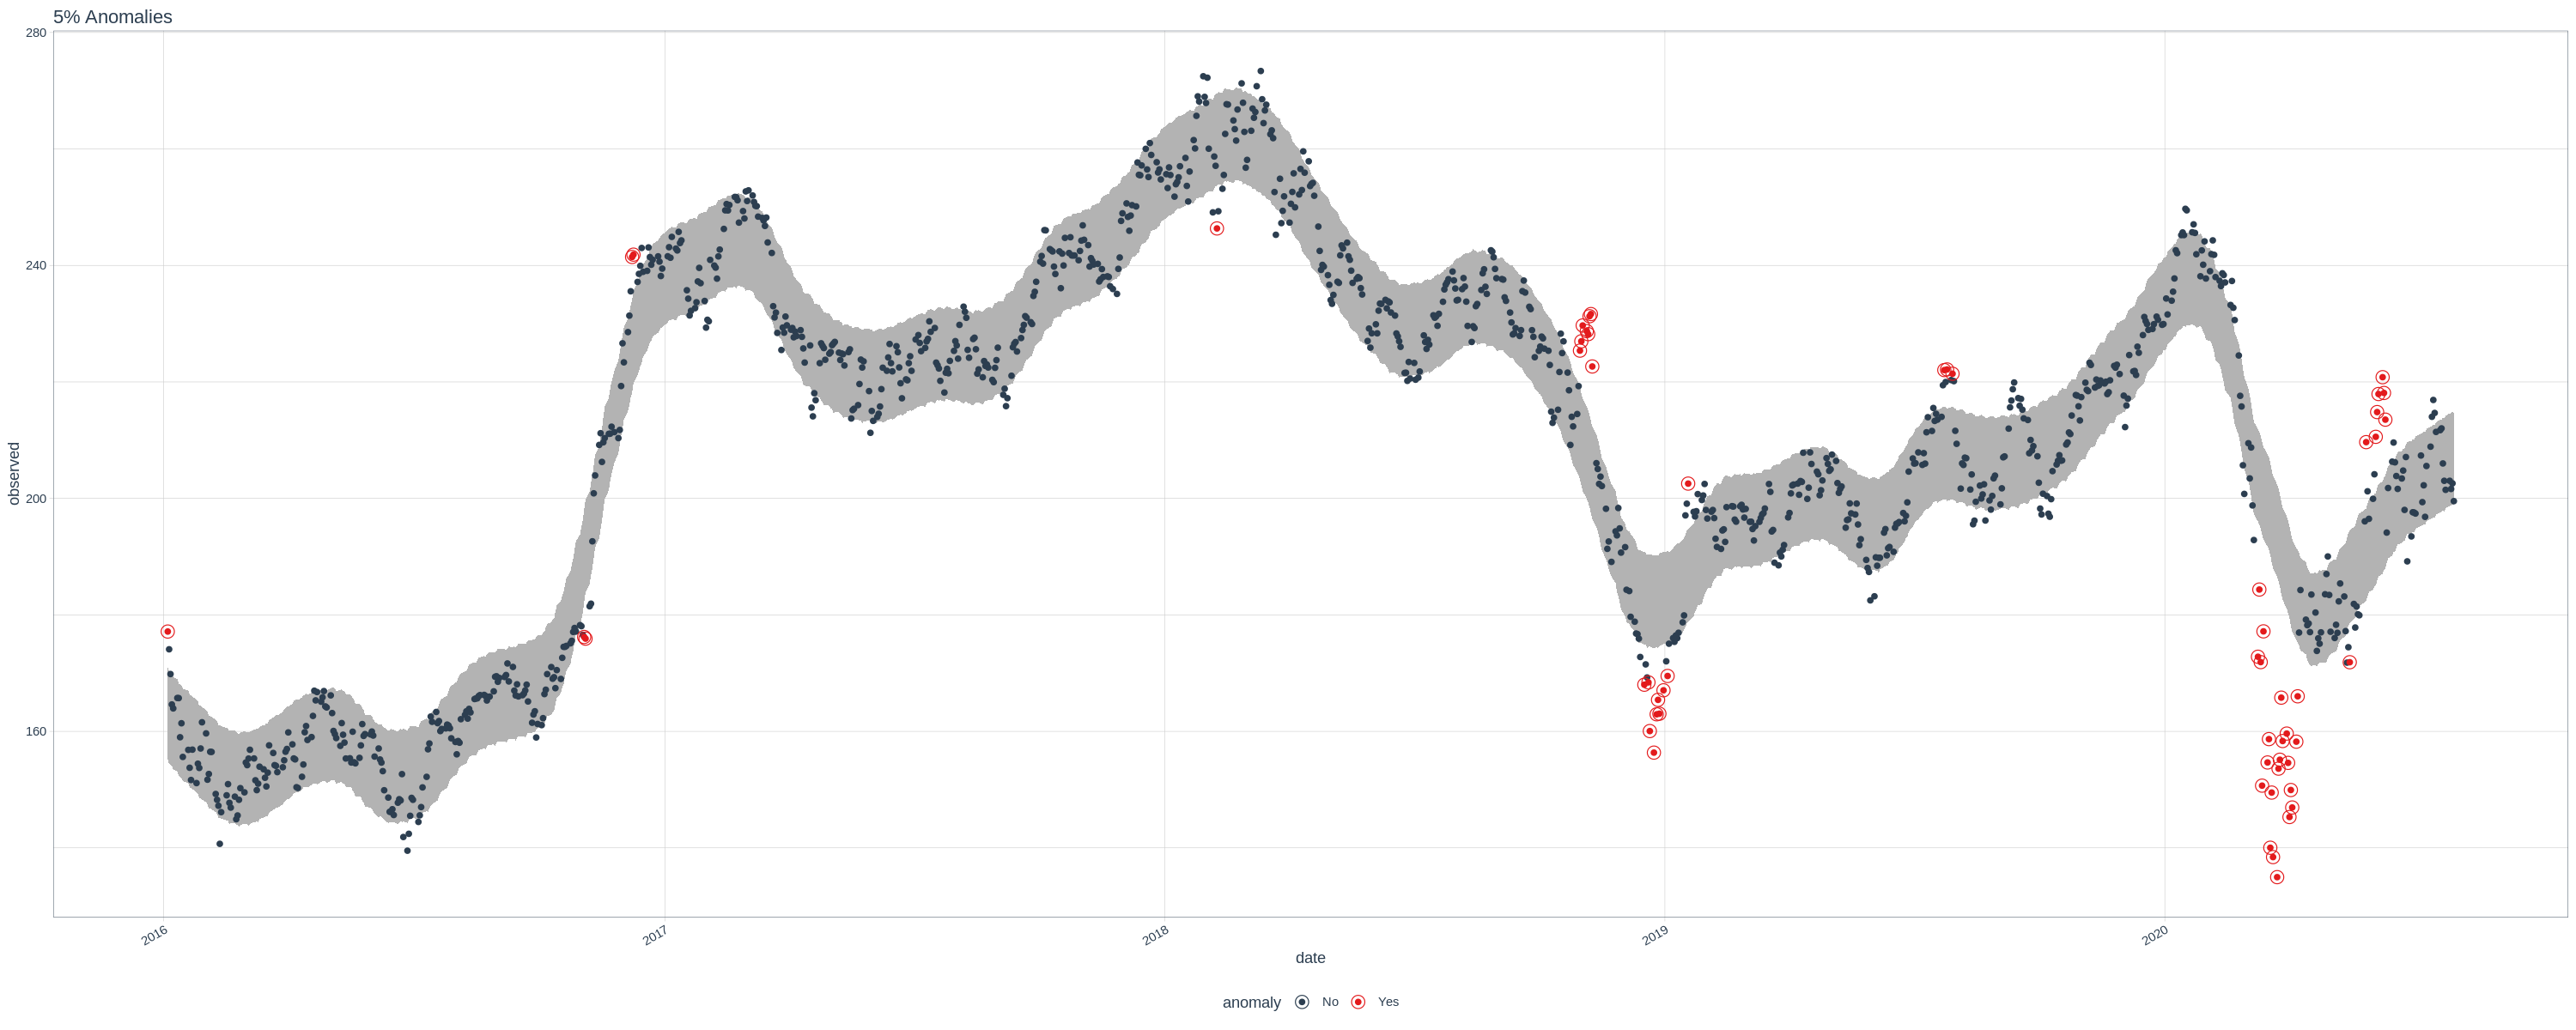

In [79]:
anom_20 <- gsachs_tbl %>%
    time_decompose(close) %>%
    anomalize(remainder, alpha = 0.3, max_anoms = 0.15) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE) +
    ggtitle("15% Anomalies")

anom_5 <- gsachs_tbl %>%
    time_decompose(close) %>%
    anomalize(remainder, alpha = 0.3, max_anoms = 0.05) %>%
    time_recompose() %>%
    plot_anomalies(time_recomposed = TRUE) +
    ggtitle("5% Anomalies")

anom_20
anom_5

### **STL Decomposition Method vs Twitter Decomposition Method**

Converting from tbl_df to tbl_time.
Auto-index message: index = date

frequency = 5 days

trend = 63 days

Converting from tbl_df to tbl_time.
Auto-index message: index = date

frequency = 5 days

median_span = 64 days



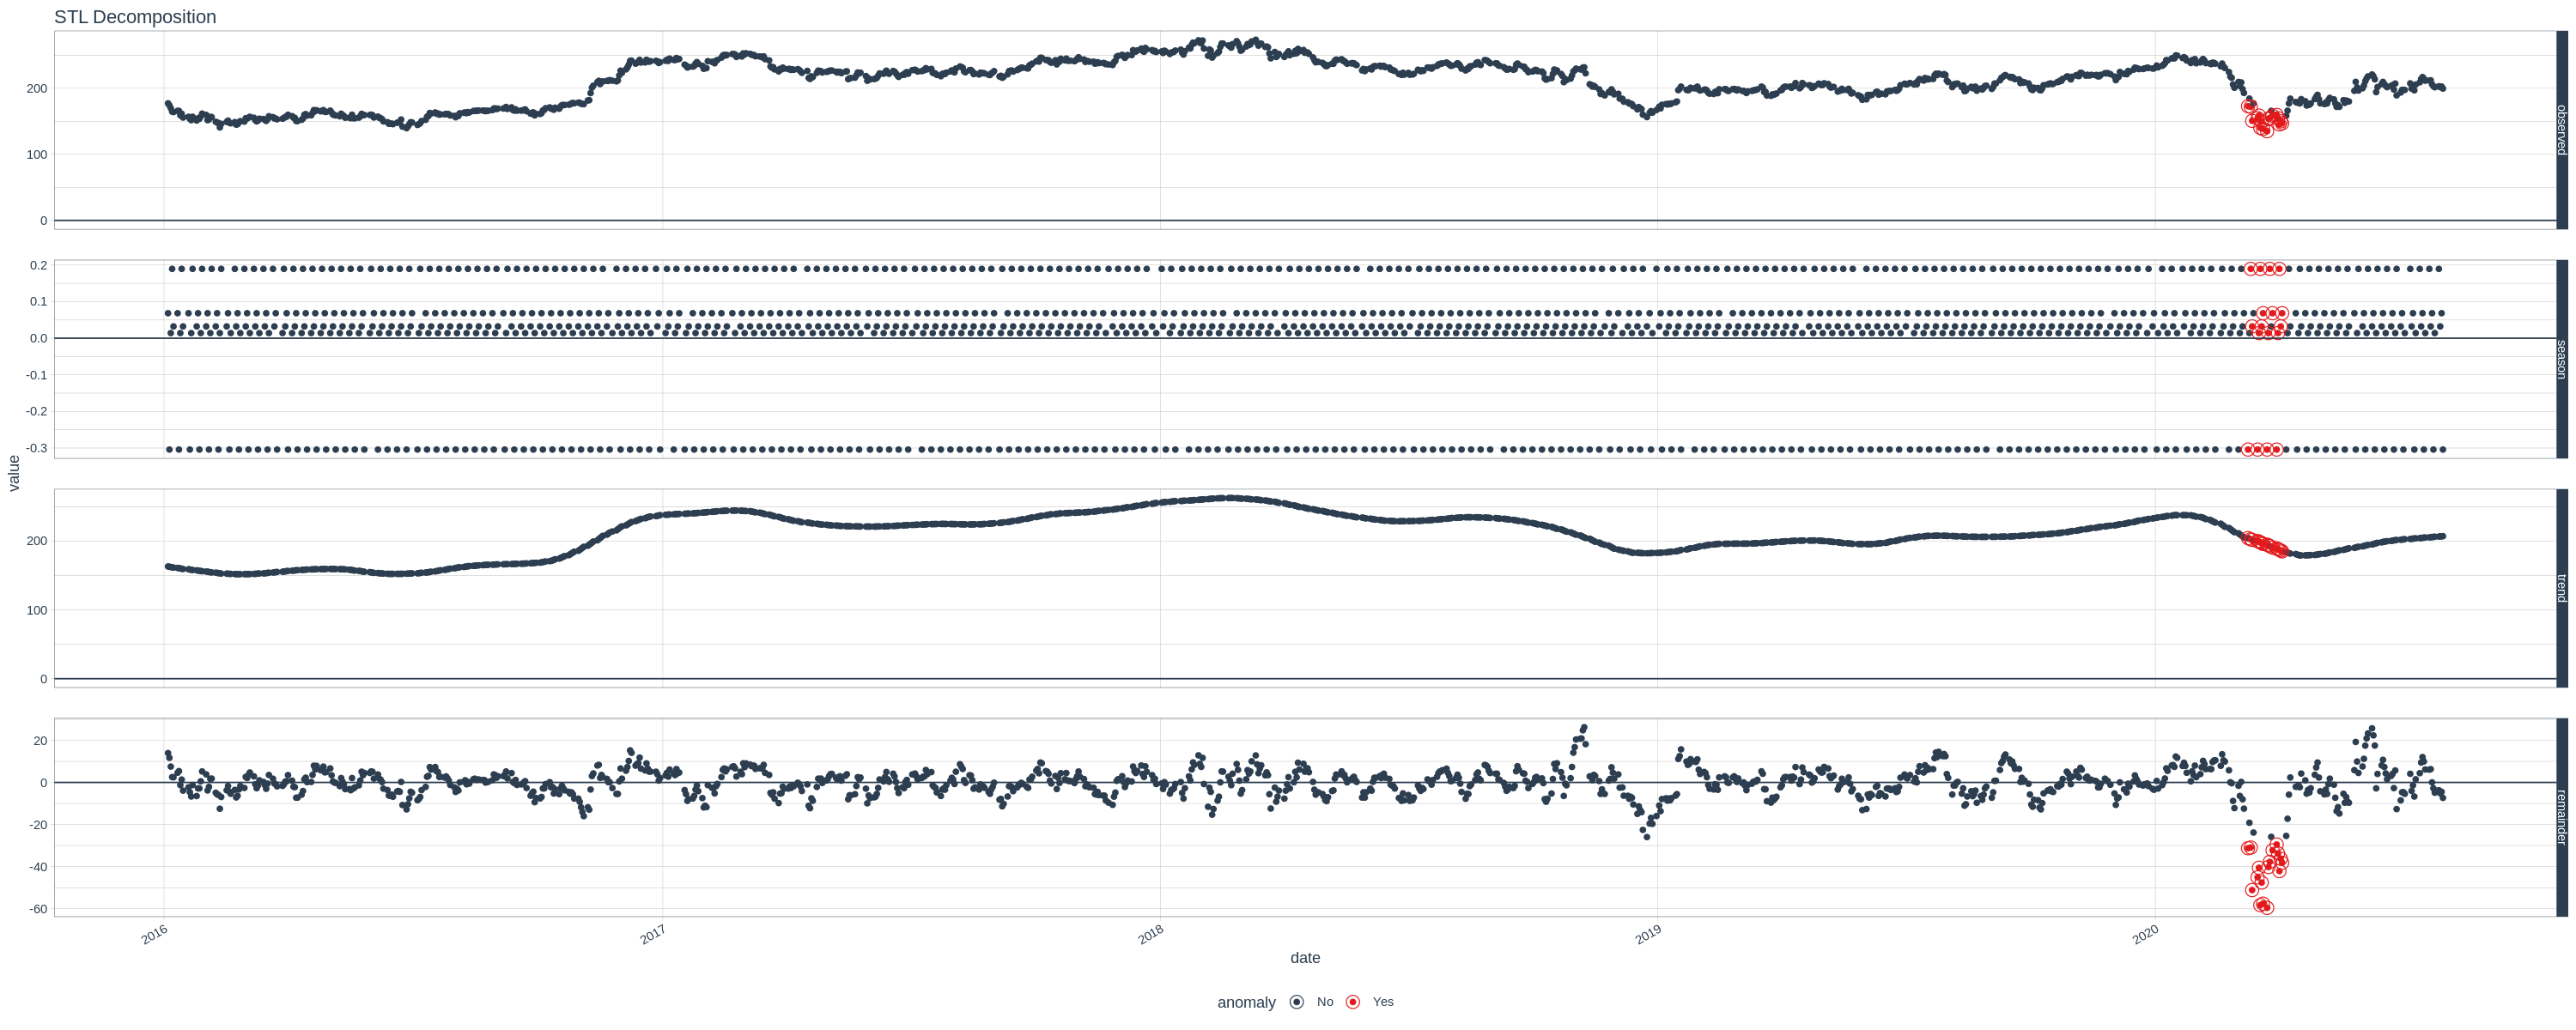

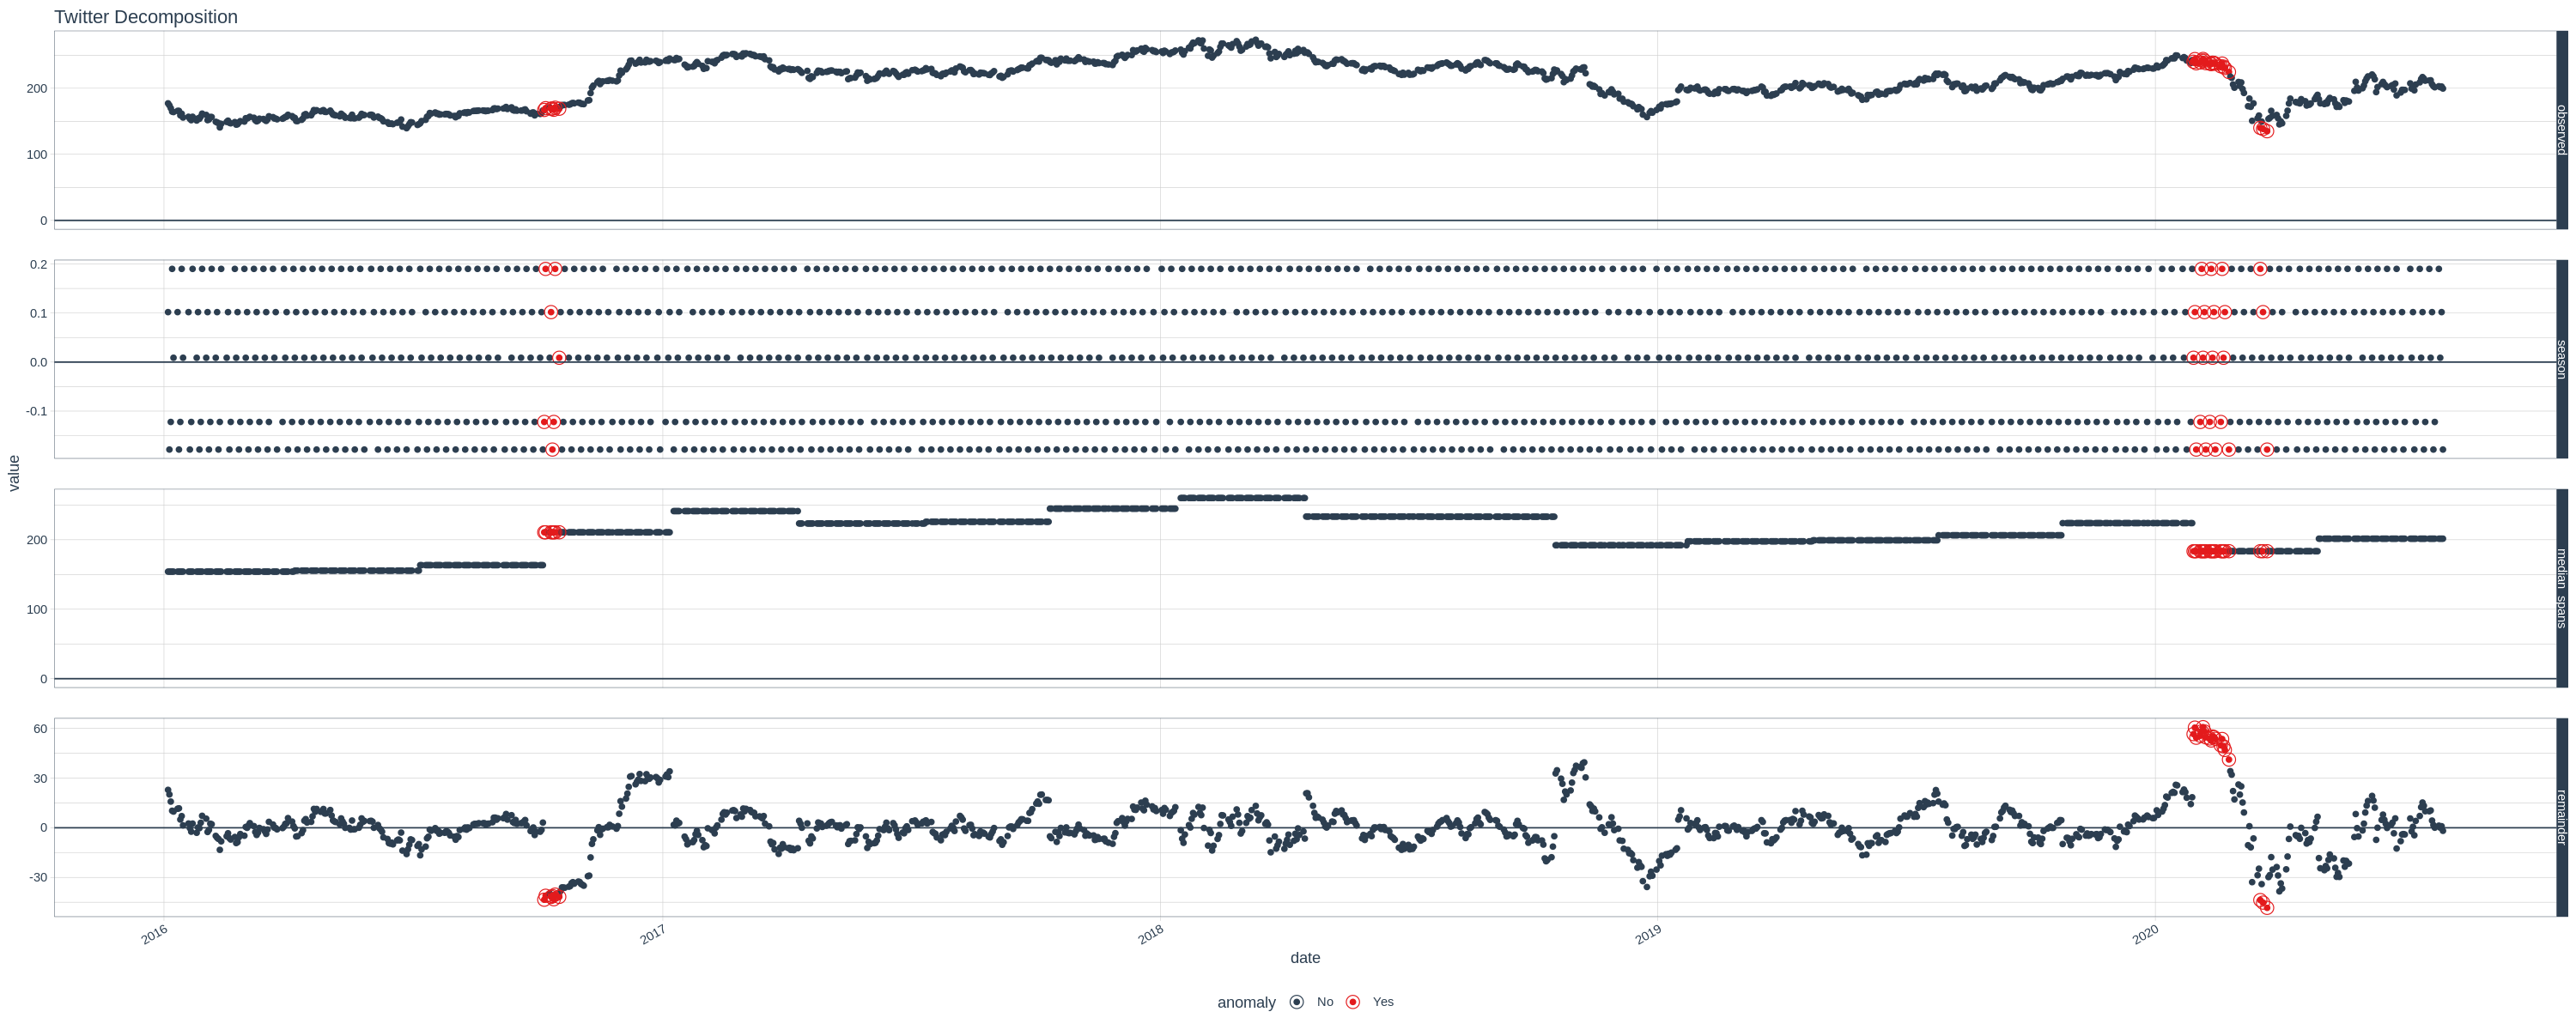

In [134]:
# STL Decomposition Method
p1 <- gsachs_tbl %>%
    time_decompose(close, 
                   method    = "stl",
                   frequency = "1 week",
                   trend     = "3 months") %>%
    anomalize(remainder) %>%
    plot_anomaly_decomposition() +
    ggtitle("STL Decomposition")

# Twitter Decomposition Method
p2 <- gsachs_tbl %>%
    time_decompose(close, 
                   method    = "twitter",
                   frequency = "1 week",
                   trend     = "3 months") %>%
    anomalize(remainder) %>%
    plot_anomaly_decomposition() +
    ggtitle("Twitter Decomposition")

p1
p2